# Computer Vision - Lab 3

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

## Load Dataset

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

## Data Preprocessing

In [5]:
#store first column as target vector
train_labels = np.array(train.label)
test_labels = np.array(test.label)

train.drop('label',axis=1, inplace=True)
test.drop('label',axis=1, inplace=True)

#Reshape - adding one more dimension to each image
train_data = np.array(train).reshape(train.shape[0],28,28,1)
test_data = np.array(test).reshape(test.shape[0],28,28,1)

#Print shapes
print('Train tensor shape: ',train_data.shape)
print('Test tensor shape: ',test_data.shape)
print('Single image shape:', train_data[0].shape)
print('Train_labels shape:', train_labels.shape)
print('Test_labels shape:', test_labels.shape)

Train tensor shape:  (60000, 28, 28, 1)
Test tensor shape:  (10000, 28, 28, 1)
Single image shape: (28, 28, 1)
Train_labels shape: (60000,)
Test_labels shape: (10000,)


In [6]:
#Create label names
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

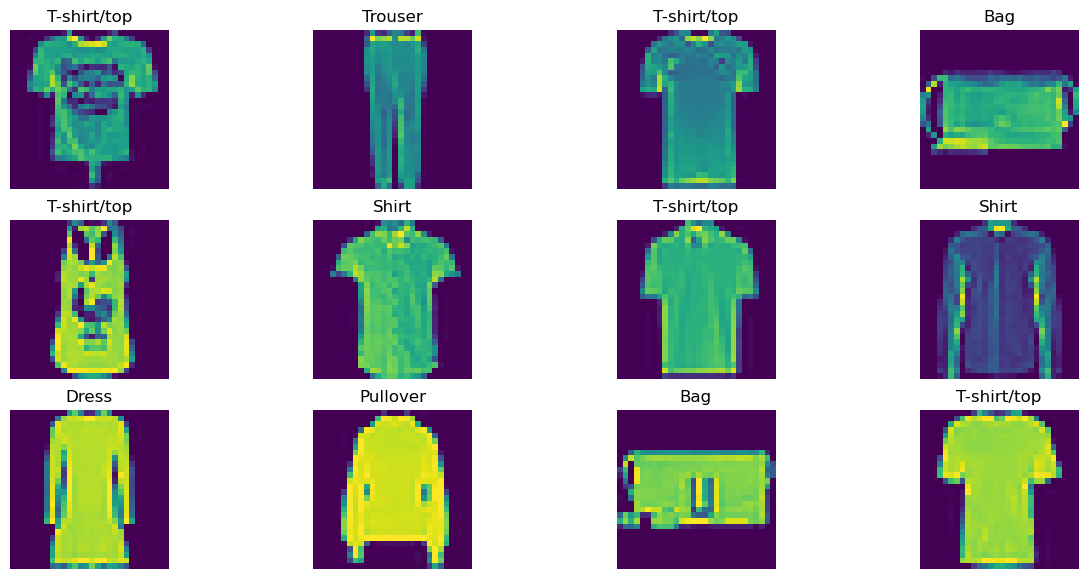

In [6]:
import random
plt.figure(figsize=(15,7))
for i in range(12):
    ax=plt.subplot(3,4,i+1)
    rand_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index])
    plt.axis(False)
    plt.title(label_names[train_labels[rand_index]])
plt.show()

In [7]:
# Normalize
train_norm = train_data / 255.0
test_norm = test_data / 255.0

In [9]:
test_norm.shape

(10000, 28, 28, 1)

In [10]:
def process_images(image,label):
    # Resize images from 28x28 to 227x227
    image = tf.image.resize(image, (227,227))
    image = tf.reshape(image, [227, 227, 1])
    return image,label

In [11]:
train_ds = tf.data.Dataset.from_tensor_slices((train_norm, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_norm,test_labels))

2022-04-25 02:00:00.894172: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-25 02:00:00.962137: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-25 02:00:00.962638: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-25 02:00:00.963671: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [12]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
print("Train data size:", train_ds_size)
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
print("Test data size:", test_ds_size)

Train data size: 60000
Test data size: 10000


In [13]:
train_ds = (train_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=16, drop_remainder=True))

In [14]:
test_ds = (test_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=16, drop_remainder=True))

In [15]:
test_ds

<BatchDataset element_spec=(TensorSpec(shape=(16, 227, 227, 1), dtype=tf.float32, name=None), TensorSpec(shape=(16,), dtype=tf.int64, name=None))>

## Build AlexNet Model

In [16]:
model1 = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

## Train Model

In [17]:
#compile model
model1.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model1.fit(train_ds, epochs=10)

Epoch 1/10


2022-04-25 02:00:56.113138: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8302


3750/3750 [==============================] - 313s 80ms/step - loss: 1.5854 - accuracy: 0.7246
Epoch 2/10
3750/3750 [==============================] - 307s 80ms/step - loss: 0.6248 - accuracy: 0.8193
Epoch 3/10
3750/3750 [==============================] - 307s 80ms/step - loss: 0.6009 - accuracy: 0.8310
Epoch 4/10
3750/3750 [==============================] - 307s 80ms/step - loss: 0.6191 - accuracy: 0.8331
Epoch 5/10
3750/3750 [==============================] - 307s 80ms/step - loss: 0.6419 - accuracy: 0.8341
Epoch 6/10
3750/3750 [==============================] - 307s 80ms/step - loss: 0.6706 - accuracy: 0.8361
Epoch 7/10
3750/3750 [==============================] - 306s 80ms/step - loss: 0.6854 - accuracy: 0.8379
Epoch 8/10
3750/3750 [==============================] - 305s 80ms/step - loss: 0.7061 - accuracy: 0.8376
Epoch 9/10
3750/3750 [==============================] - 305s 80ms/step - loss: 0.7066 - accuracy: 0.8402
Epoch 10/10
3750/3750 [==============================] - 305s 80ms

In [19]:
model1.save('alexnet_model')
#loaded_model = tf.keras.models.load_model('/tmp/model')

2022-04-25 02:52:39.421055: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: alexnet_model/assets


## Evaluate Model

In [18]:
model1.evaluate(test_ds)

625/625 [==============================] - 11s 16ms/step - loss: 0.5017 - accuracy: 0.7911


[0.5016710162162781, 0.791100025177002]

## Similarity Model

In [33]:
import numpy as np
import os
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [34]:
from sklearn.model_selection import train_test_split
data_train = pd.read_csv('fashion-mnist_train.csv')
X_full = data_train.iloc[:,1:]
y_full = data_train.iloc[:,:1]
x_train, x_test, y_train, y_test = train_test_split(X_full, y_full, test_size
= 0.3)

In [35]:
x_train = x_train.values.reshape(-1, 28, 28, 1).astype('float32') / 255.
x_test = x_test.values.reshape(-1, 28, 28, 1).astype('float32') / 255.
y_train = y_train.values.astype('int')
y_test = y_test.values.astype('int')
print('Training', x_train.shape, x_train.max())
print('Testing', x_test.shape, x_test.max())

Training (42000, 28, 28, 1) 1.0
Testing (18000, 28, 28, 1) 1.0


In [37]:
# reorganize by groups
train_groups = [x_train[np.where(y_train==i)[0]] for i in np.unique(y_train)]
test_groups = [x_test[np.where(y_test==i)[0]] for i in np.unique(y_train)]
print('train groups:', [x.shape[0] for x in train_groups])
print('test groups:', [x.shape[0] for x in test_groups])

train groups: [4198, 4153, 4207, 4255, 4191, 4160, 4168, 4234, 4233, 4201]
test groups: [1802, 1847, 1793, 1745, 1809, 1840, 1832, 1766, 1767, 1799]


In [ ]:
def gen_random_batch(in_groups, batch_halfsize = 8):
    out_img_a, out_img_b, out_score = [], [], []
    all_groups = list(range(len(in_groups)))
    for match_group in [True, False]:
        group_idx = np.random.choice(all_groups, size = batch_halfsize)
        out_img_a += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in group_idx]
        if match_group:
            b_group_idx = group_idx
            out_score += [1]*batch_halfsize
        else:
        # anything but the same group
            non_group_idx = [np.random.choice([i for i in all_groups if i!=c_idx]) for c_idx in group_idx]
            b_group_idx = non_group_idx
            out_score += [0]*batch_halfsize
        out_img_b += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in b_group_idx]
    return np.stack(out_img_a,0), np.stack(out_img_b,0), np.stack(out_score,0)

In [38]:
def gen_random_batch(in_groups, batch_halfsize = 8):
    out_img_a, out_img_b, out_score = [], [], []
    all_groups = list(range(len(in_groups)))
    for match_group in [True, False]:
        group_idx = np.random.choice(all_groups, size = batch_halfsize)
        out_img_a += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in group_idx]
        if match_group:
            b_group_idx = group_idx
            out_score += [1]*batch_halfsize
        else:
            # anything but the same group
            non_group_idx = [np.random.choice([i for i in all_groups if i!=c_idx]) for c_idx in group_idx] 
            b_group_idx = non_group_idx
            out_score += [0]*batch_halfsize
            
        out_img_b += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in b_group_idx]
            
    return np.stack(out_img_a,0), np.stack(out_img_b,0), np.stack(out_score,0)

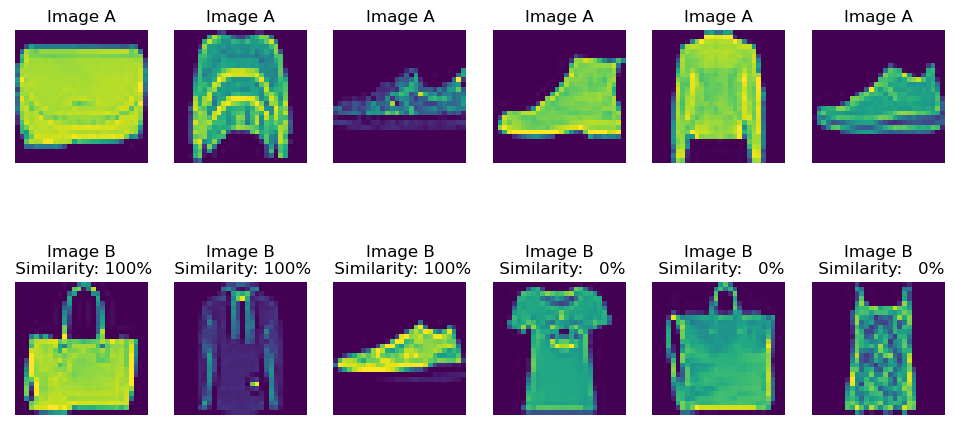

In [39]:
pv_a, pv_b, pv_sim = gen_random_batch(train_groups, 3)
fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
for c_a, c_b, c_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, m_axs.T):
    ax1.imshow(c_a[:,:,0])
    ax1.set_title('Image A')
    ax1.axis('off')
    ax2.imshow(c_b[:,:,0])
    ax2.set_title('Image B\n Similarity: %3.0f%%' % (100*c_d))
    ax2.axis('off')
plt.show()

In [7]:
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Activation, Flatten, Dense, Dropout
img_in = Input(shape = x_train.shape[1:], name = 'FeatureNet_ImageInput')
n_layer = img_in
for i in range(2):
    n_layer = Conv2D(8*2**i, kernel_size = (3,3), activation = 'linear')(n_layer)
    n_layer = BatchNormalization()(n_layer)
    n_layer = Activation('relu')(n_layer)
    n_layer = Conv2D(16*2**i, kernel_size = (3,3), activation = 'linear')(n_layer)
    n_layer = BatchNormalization()(n_layer)
    n_layer = Activation('relu')(n_layer)
    n_layer = MaxPool2D((2,2))(n_layer)
n_layer = Flatten()(n_layer)
n_layer = Dense(32, activation = 'linear')(n_layer)
n_layer = Dropout(0.5)(n_layer)
n_layer = BatchNormalization()(n_layer)
n_layer = Activation('relu')(n_layer)
feature_model = Model(inputs = [img_in], outputs = [n_layer], name = 'FeatureGenerationModel')
feature_model.summary()

Model: "FeatureGenerationModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FeatureNet_ImageInput (Input [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 8)         32        
_________________________________________________________________
activation (Activation)      (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 

In [86]:
from keras.layers import concatenate
img_a_in = Input(shape = x_train.shape[1:], name = 'ImageA_Input')
img_b_in = Input(shape = x_train.shape[1:], name = 'ImageB_Input')
img_a_feat = feature_model(img_a_in)
img_b_feat = feature_model(img_b_in)
combined_features = concatenate([img_a_feat, img_b_feat], name = 'merge_features')
combined_features = Dense(16, activation = 'linear')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)
combined_features = Dense(4, activation = 'linear')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)
combined_features = Dense(1, activation = 'sigmoid')(combined_features)
similarity_model = Model(inputs = [img_a_in, img_b_in], outputs = [combined_features], name = 'Similarity_Model')
similarity_model.summary()

Model: "Similarity_Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ImageA_Input (InputLayer)       [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
ImageB_Input (InputLayer)       [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
FeatureGenerationModel (Functio (None, 32)           25040       ImageA_Input[0][0]               
                                                                 ImageB_Input[0][0]               
__________________________________________________________________________________________________
merge_features (Concatenate)    (None, 64)           0           FeatureGenerationM

In [87]:
# setup the optimization process
similarity_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

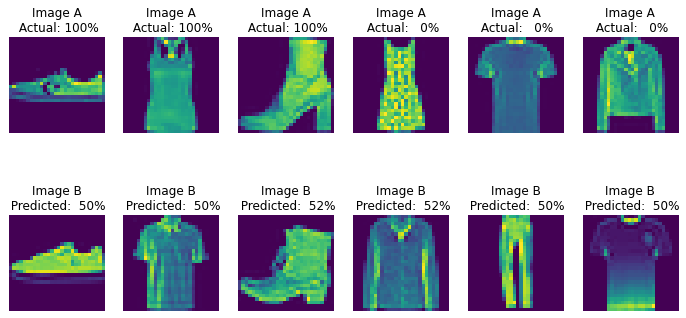

In [88]:
def show_model_output(nb_examples = 3):
    pv_a, pv_b, pv_sim = gen_random_batch(test_groups, nb_examples)
    pred_sim = similarity_model.predict([pv_a, pv_b])
    fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
    for c_a, c_b, c_d, p_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, pred_sim, m_axs.T):
        ax1.imshow(c_a[:,:,0])
        ax1.set_title('Image A\n Actual: %3.0f%%' % (100*c_d))
        ax1.axis('off')
        ax2.imshow(c_b[:,:,0])
        ax2.set_title('Image B\n Predicted: %3.0f%%' % (100*p_d))
        ax2.axis('off')
    plt.show()
    return fig
# a completely untrained model
_ = show_model_output()

In [89]:
# make a generator out of the data
def siam_gen(in_groups, batch_size = 32):
    while True:
        pv_a, pv_b, pv_sim = gen_random_batch(train_groups, batch_size//2)
        yield [pv_a, pv_b], pv_sim
# we want a constant validation group to have a frame of reference for model performance
valid_a, valid_b, valid_sim = gen_random_batch(test_groups, 1024)
loss_history = similarity_model.fit(siam_gen(train_groups), 
                               steps_per_epoch = 500,
                                               epochs = 10,
                                             verbose = True)

Epoch 1/10
500/500 [==============================] - 25s 46ms/step - loss: 0.6069 - accuracy: 0.6841
Epoch 2/10
500/500 [==============================] - 25s 49ms/step - loss: 0.4473 - accuracy: 0.7997
Epoch 3/10
500/500 [==============================] - 22s 43ms/step - loss: 0.3976 - accuracy: 0.8240
Epoch 4/10
500/500 [==============================] - 23s 46ms/step - loss: 0.3700 - accuracy: 0.8367
Epoch 5/10
500/500 [==============================] - 22s 44ms/step - loss: 0.3614 - accuracy: 0.8443
Epoch 6/10
500/500 [==============================] - 22s 44ms/step - loss: 0.3516 - accuracy: 0.8449
Epoch 7/10
500/500 [==============================] - 22s 45ms/step - loss: 0.3508 - accuracy: 0.8454
Epoch 8/10
500/500 [==============================] - 23s 45ms/step - loss: 0.3433 - accuracy: 0.8517
Epoch 9/10
500/500 [==============================] - 22s 45ms/step - loss: 0.3424 - accuracy: 0.8525
Epoch 10/10
500/500 [==============================] - 23s 46ms/step - loss: 0.341

In [30]:
#similarity_model.evaluate(x_test, y_test)

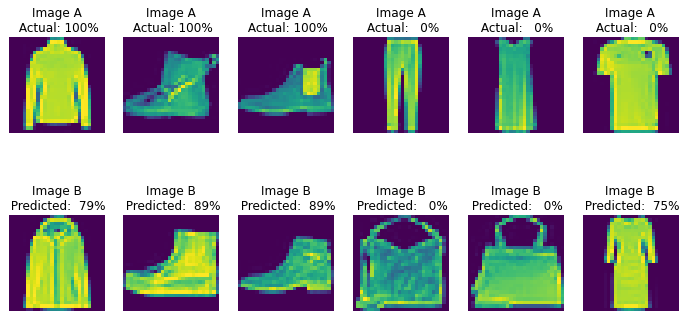

In [90]:
_ = show_model_output()

## T-SNE

In [61]:
t_shirt_vec = np.stack([train_groups[0][0]]*x_test.shape[0],0)
t_shirt_score = similarity_model.predict([t_shirt_vec, x_test], verbose =
True, batch_size = 128)
ankle_boot_vec = np.stack([train_groups[-1][0]]*x_test.shape[0],0)
ankle_boot_score = similarity_model.predict([ankle_boot_vec, x_test], verbose
= True, batch_size = 128)

141/141 [==============================] - 3s 20ms/step


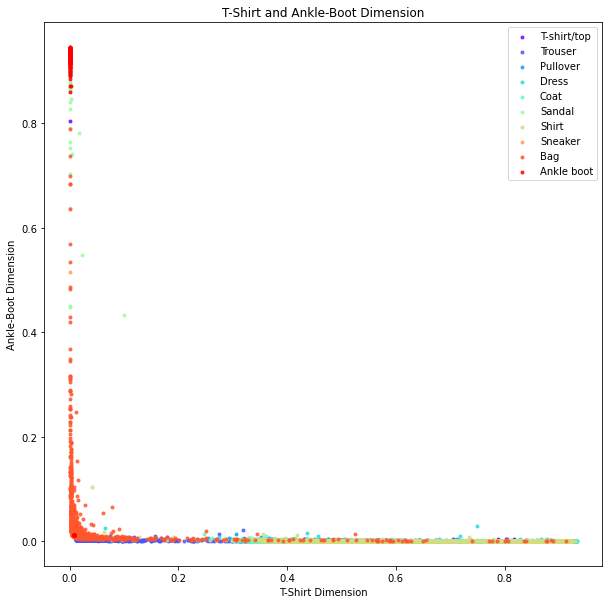

In [83]:
obj_categories = ['T-shirt/top','Trouser','Pullover','Dress',
                  'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'
                 ]
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
plt.figure(figsize=(10, 10))

for c_group, (c_color, c_label) in enumerate(zip(colors, obj_categories)):
    plt.scatter(t_shirt_score[np.where(y_test == c_group), 0],
                ankle_boot_score[np.where(y_test == c_group), 0],
                marker='.',
                color=c_color,
                linewidth=1,
                alpha=0.8,
                label=c_label)
plt.xlabel('T-Shirt Dimension')
plt.ylabel('Ankle-Boot Dimension')
plt.title('T-Shirt and Ankle-Boot Dimension')
plt.legend(loc='best')
#plt.savefig('tshirt-boot-dist.png')
plt.show(block=False)

In [63]:
x_test_features = feature_model.predict(x_test, verbose = True,
batch_size=128)

141/141 [==============================] - 2s 13ms/step


In [45]:
len(x_test_features)

18000

In [64]:
tsne_obj = TSNE(n_components=2,
init='pca',
random_state=101,
method='barnes_hut',
n_iter=500,
verbose=2)
tsne_features = tsne_obj.fit_transform(x_test_features)

C:\Users\ylila\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 18000 samples in 0.000s...
[t-SNE] Computed neighbors for 18000 samples in 14.146s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18000
[t-SNE] Computed conditional probabilities for sample 2000 / 18000
[t-SNE] Computed conditional probabilities for sample 3000 / 18000
[t-SNE] Computed conditional probabilities for sample 4000 / 18000
[t-SNE] Computed conditional probabilities for sample 5000 / 18000
[t-SNE] Computed conditional probabilities for sample 6000 / 18000
[t-SNE] Computed conditional probabilities for sample 7000 / 18000
[t-SNE] Computed conditional probabilities for sample 8000 / 18000
[t-SNE] Computed conditional probabilities for sample 9000 / 18000
[t-SNE] Computed conditional probabilities for sample 10000 / 18000
[t-SNE] Computed conditional probabilities for sample 11000 / 18000
[t-SNE] Computed conditional probabilities for sample 12000 / 18000
[t-SNE] Computed conditional probabilities for sa

C:\Users\ylila\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Iteration 50: error = 83.0003738, gradient norm = 0.0021568 (50 iterations in 3.937s)
[t-SNE] Iteration 100: error = 80.6817780, gradient norm = 0.0012058 (50 iterations in 3.728s)
[t-SNE] Iteration 150: error = 79.6152573, gradient norm = 0.0007535 (50 iterations in 4.981s)
[t-SNE] Iteration 200: error = 79.0638428, gradient norm = 0.0005909 (50 iterations in 5.442s)
[t-SNE] Iteration 250: error = 78.7059784, gradient norm = 0.0004743 (50 iterations in 5.004s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.705978
[t-SNE] Iteration 300: error = 3.2421656, gradient norm = 0.0012331 (50 iterations in 5.093s)
[t-SNE] Iteration 350: error = 2.7223914, gradient norm = 0.0006366 (50 iterations in 5.048s)
[t-SNE] Iteration 400: error = 2.4133422, gradient norm = 0.0004059 (50 iterations in 4.922s)
[t-SNE] Iteration 450: error = 2.2171187, gradient norm = 0.0002831 (50 iterations in 4.715s)
[t-SNE] Iteration 500: error = 2.0808649, gradient norm = 0.0002163 (50 

In [76]:
tsne_df = pd.DataFrame(columns=['Dimension_1', 'Dimension_2', 'target'],
                       data=np.column_stack((tsne_features, 
                                            y_test)))

In [78]:
tsne_df.loc[:, 'target'] = tsne_df.target
tsne_df.head()

,Dimension_1,Dimension_2,target
0,5.530316,-15.667868,8.0
1,-10.453172,-4.084539,4.0
2,14.764040,8.484101,5.0
3,21.924829,-10.122705,7.0
4,-7.756281,-10.543056,6.0


In [79]:
clothes_map = {0:'T-shirt/top',
               1: 'Trouser',
               2: 'Pullover',
               3: 'Dress',
               4: 'Coat',
               5: 'Sandal',
               6: 'Shirt',
               7: 'Sneaker',
               8: 'Bag',
               9: 'Ankle Boot'}
# map targets to actual clothes for plotting
tsne_df.loc[:, 'target'] = tsne_df.target.map(clothes_map)

<AxesSubplot:>

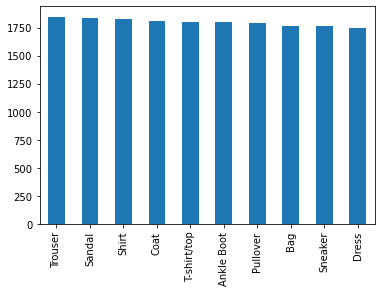

In [80]:
%matplotlib inline
tsne_df.target.value_counts().plot(kind='bar')

C:\Users\ylila\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


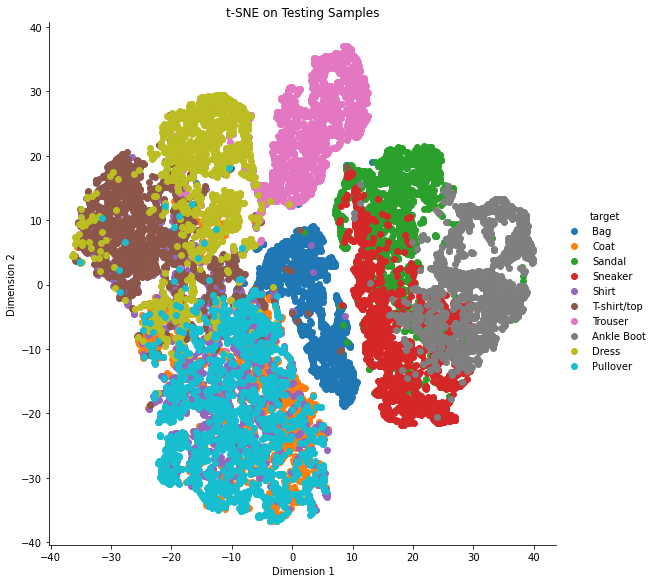

In [82]:
grid = sns.FacetGrid(tsne_df, hue="target", size=8)
grid.map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('t-SNE on Testing Samples')
plt.xlabel('Dimension 1') 
plt.ylabel('Dimension 2') 
plt.show()